In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('archive/ks-projects-201801.csv')

In [3]:
# df = df.drop(columns=['name', 'ID', 'category',])
df = df.dropna()
df.shape

(374860, 15)

In [4]:
df['launched'] = pd.to_datetime(df['launched'])
df['deadline'] = pd.to_datetime(df['deadline'])
df['duration'] = df['deadline'] - df['launched']
df['duration'] = df['duration'].apply(lambda x: x.days)

In [5]:
df.head(3)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,duration
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,58
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,59
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,44


In [6]:
df = df.drop(columns=['name','ID','category','currency','deadline', 'launched', 'pledged', 'usd pledged', 'usd_pledged_real',])

In [25]:
df['state'].unique()

array(['failed', 'canceled', 'successful', 'live', 'suspended'],
      dtype=object)

In [7]:
df['state']= df['state'].replace({
    'canceled' :'failed',
    'suspended' : 'failed',
})

df = df[df['state'] != 'live']

In [27]:
df['state'].value_counts(normalize=True)

failed        0.640245
successful    0.359755
Name: state, dtype: float64

In [8]:
df['state'] = df['state'].replace({'failed':0, 'successful':1})

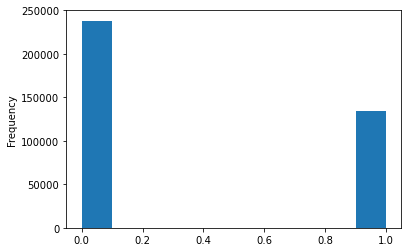

In [29]:
df['state'].plot(kind='hist');

In [30]:
df.head(3)

,main_category,goal,state,backers,country,usd_goal_real,duration
0,Publishing,1000.0,0,0,GB,1533.95,58
1,Film & Video,30000.0,0,15,US,30000.00,59
2,Film & Video,45000.0,0,3,US,45000.00,44


In [12]:
X, y = df.drop(columns='state').values, df['state'].values
X, y = X[:len(X)//2], y[:len(y)//2]

In [13]:
len(X)

186031

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from category_encoders import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
# from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([
        ("encoder", OneHotEncoder()),
        ("scale", StandardScaler()),
        ("model", LogisticRegression()),
])


model = RandomizedSearchCV(estimator=pipe,
                           param_distributions={'model__max_iter':np.linspace(100, 1000, 50)},
                           cv=2,
                           verbose=1)
# pipe.get_params()
model.fit(X,y)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

